In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [81]:
N2_input = pd.read_csv('data/N2_input.csv', index_col='cycle')
N2_target = pd.read_csv('data/N2_target.csv', index_col='cycle')
NH3_input = pd.read_csv('data/NH3_input.csv', index_col='cycle')
NH3_target = pd.read_csv('data/NH3_target.csv', index_col='cycle')
N2_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000423,0.000040,0.000463,0.000644,0.0,0.000060,0.000141,0.0,...,0.0,0.00002,0.00000,0.000000,0.000262,0.001087,0.000000,0.0,0.0,0.00004
1,0.0,0.0,0.000486,0.000405,0.000142,0.000546,0.0,0.000040,0.000000,0.0,...,0.0,0.00000,0.00000,0.000182,0.000101,0.001011,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.000000,0.0,...,0.0,0.00000,0.00004,0.000101,0.000282,0.000825,0.000000,0.0,0.0,0.00000
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.0,0.000000,0.000162,0.0,...,0.0,0.00000,0.00000,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.00000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.0,0.000261,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.00000


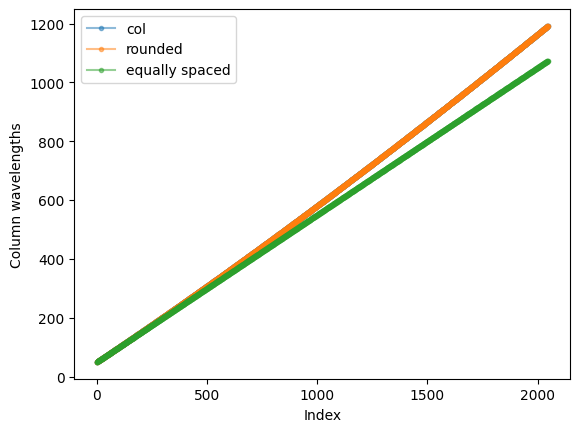

In [82]:
f_columns = [float(i) for i in N2_input.columns.values]
f_round_columns = [round(i, 1) for i in f_columns]
f_new_columns = [f_columns[0]+0.5*i for i in range(len(f_columns))]
plt.plot(f_columns,'.-', alpha=0.5)
plt.plot(f_round_columns,'.-', alpha=0.5)
plt.plot(f_new_columns,'.-', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Column wavelengths')
plt.legend(['col','rounded','equally spaced'])
plt.show()

In [83]:
N2_target.head()

,C1s,N1s,O1s,Si2p,Cl2p
cycle,,,,,
0,0.023402,0.275563,0.188880,0.474089,0.038067
1,0.023367,0.275311,0.188843,0.474470,0.038009
2,0.023331,0.275058,0.188807,0.474851,0.037952
3,0.023296,0.274806,0.188771,0.475232,0.037894
4,0.023261,0.274554,0.188735,0.475613,0.037836


In [84]:
NH3_input

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.004101,0.002187,0.004647,0.009568,0.000000,0.001367,0.000000,0.0,...,0.0,0.000000,0.0,0.001640,0.000000,0.013669,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000508,0.000000,0.004319,0.008638,0.000508,0.000000,0.000000,0.0,...,0.0,0.001524,0.0,0.000000,0.001270,0.011433,0.000000,0.0,0.0,0.001016
2,0.0,0.0,0.005486,0.002494,0.004738,0.011970,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.001746,0.011471,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000716,0.002387,0.001910,0.007878,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.001432,0.011220,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000711,0.000000,0.002134,0.008063,0.000949,0.000949,0.000000,0.0,...,0.0,0.001186,0.0,0.001660,0.000711,0.012094,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.001506,0.000000,0.004268,0.012051,0.001004,0.000000,0.001506,0.0,...,0.0,0.000000,0.0,0.002009,0.000000,0.012804,0.000000,0.0,0.0,0.000000
59,0.0,0.0,0.000517,0.003881,0.002846,0.007503,0.000000,0.000517,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.013454,0.000000,0.0,0.0,0.001552
60,0.0,0.0,0.002957,0.001232,0.003696,0.012075,0.002464,0.001232,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.010843,0.000739,0.0,0.0,0.000000


In [85]:
NH3_target

,C1s,N1s,O1s,Si2p,Cl2p
cycle,,,,,
0,0.013147,0.466584,0.044964,0.472566,0.002740
1,0.013152,0.465232,0.045568,0.473319,0.002730
2,0.013156,0.463879,0.046172,0.474073,0.002719
3,0.013161,0.462527,0.046776,0.474827,0.002709
4,0.013166,0.461175,0.047380,0.475581,0.002698
...,...,...,...,...,...
58,0.013224,0.280720,0.123958,0.579462,0.002636
59,0.013223,0.276163,0.125874,0.582100,0.002641
60,0.013222,0.271606,0.127789,0.584738,0.002645


In [86]:
N2_input.columns = [round(float(i), 1) for i in N2_input.columns.values]
NH3_input.columns = [round(float(i), 1) for i in NH3_input.columns.values]

In [87]:
# scaling the column
print(len(N2_input.columns), N2_input.columns)

2048 Index([  49.8,   50.2,   50.8,   51.2,   51.8,   52.3,   52.8,   53.3,   53.8,
         54.3,
       ...
       1186.4, 1187.0, 1187.6, 1188.2, 1188.8, 1189.4, 1190.0, 1190.6, 1191.2,
       1191.8],
      dtype='float64', length=2048)


In [88]:
print(len(NH3_input), len(NH3_target), len(N2_input), len(N2_target))

63 63 119 119


In [89]:
# interpolation
import numpy as np
new_col = np.arange(NH3_input.columns[0], NH3_input.columns[-1]+0.1, 0.1)
NH3_input_inter = pd.DataFrame(columns=new_col, index=NH3_input.index)
for idx, row in NH3_input.iterrows():
    NH3_input_inter.iloc[idx] = np.interp(new_col, NH3_input.columns.values, NH3_input.iloc[idx])
NH3_input_inter.index.name = 'cycle'
NH3_input_inter

,49.8,49.9,50.0,50.1,50.2,50.3,50.4,50.5,50.6,50.7,...,1190.9,1191.0,1191.1,1191.2,1191.3,1191.4,1191.5,1191.6,1191.7,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000683,0.001367,0.00205,0.002734,0.003417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000085,0.000169,0.000254,0.000339,0.000423,...,0.0,0.0,0.0,0.0,0.000169,0.000339,0.000508,0.000678,0.000847,0.001016
2,0.0,0.0,0.0,0.0,0.0,0.000914,0.001829,0.002743,0.003658,0.004572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000119,0.000239,0.000358,0.000477,0.000597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000119,0.000237,0.000356,0.000474,0.000593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,0.0,0.000251,0.000502,0.000753,0.001004,0.001255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.000086,0.000172,0.000259,0.000345,0.000431,...,0.0,0.0,0.0,0.0,0.000259,0.000517,0.000776,0.001035,0.001294,0.001552
60,0.0,0.0,0.0,0.0,0.0,0.000493,0.000986,0.001479,0.001971,0.002464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
new_col = np.arange(N2_input.columns[0], N2_input.columns[-1]+0.1, 0.1)
N2_input_inter = pd.DataFrame(columns=new_col, index=N2_input.index)
for idx, row in N2_input.iterrows():
    N2_input_inter.iloc[idx] = np.interp(new_col, N2_input.columns.values, N2_input.iloc[idx])
N2_input_inter.index.name = 'cycle'
N2_input_inter

,49.8,49.9,50.0,50.1,50.2,50.3,50.4,50.5,50.6,50.7,...,1190.9,1191.0,1191.1,1191.2,1191.3,1191.4,1191.5,1191.6,1191.7,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.00007,0.000141,0.000211,0.000282,0.000352,...,0.0,0.0,0.0,0.0,0.000007,0.000013,0.00002,0.000027,0.000034,0.00004
1,0.0,0.0,0.0,0.0,0.0,0.000081,0.000162,0.000243,0.000324,0.000405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000044,0.000087,0.000131,0.000174,0.000218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000013,0.000027,0.00004,0.000054,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00002,0.00004,0.00006,0.00008,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.0,0.0,0.000036,0.000072,0.000108,0.000144,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.000004,0.000007,0.000011,0.000014,0.000018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.000018,0.000036,0.000054,0.000072,0.00009,...,0.0,0.0,0.0,0.0,0.000043,0.000086,0.000129,0.000172,0.000215,0.000258


In [115]:
N2_input_inter.columns

Index([              49.8,               49.9,               50.0,
                     50.1,               50.2, 50.300000000000004,
       50.400000000000006,  50.50000000000001,  50.60000000000001,
        50.70000000000001,
       ...
       1190.9000000000162, 1191.0000000000161, 1191.1000000000163,
       1191.2000000000162,  1191.300000000016, 1191.4000000000162,
       1191.5000000000161, 1191.6000000000163, 1191.7000000000162,
        1191.800000000016],
      dtype='float64', length=11421)

In [122]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in N2_input_inter.columns.astype(float)]
N2_input_inter.columns = new_col

new_col = [str(DropFromSecond(x)) for x in NH3_input_inter.columns.astype(float)]
NH3_input_inter.columns = new_col
NH3_input_inter.columns

Index(['49.8', '49.9', '50.0', '50.1', '50.2', '50.3', '50.4', '50.5', '50.6',
       '50.7',
       ...
       '1190.9', '1191.0', '1191.1', '1191.2', '1191.3', '1191.4', '1191.5',
       '1191.6', '1191.7', '1191.8'],
      dtype='object', length=11421)

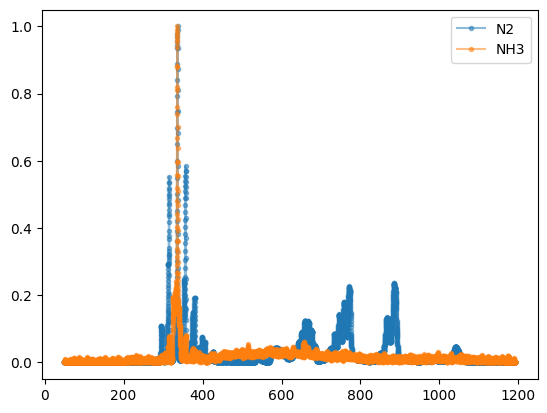

In [118]:
# wavelength scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(N2_input_inter.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(N2_input_inter.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

plt.plot(wavelength_scaled, N2_input_inter.iloc[0], '.-', alpha=0.5)
plt.plot(wavelength_scaled, NH3_input_inter.iloc[0], '.-', alpha=0.5)
plt.legend(['N2','NH3'])
plt.show()

In [120]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = wavelength_scaled
y =  NH3_input_inter.iloc[0]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]', title='Process #3; NH3')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[3]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#E805DA'},
              'marker': {'color': [#E805DA, #E805DA, #E805DA, ..., #E805DA,
                                   #E805DA, #E805DA],
                         'line': {'color': [#E805DA, #E805DA, #E805DA, ...,
                                            #E805DA, #E805DA, #E805DA],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '873c142e-22a9-471c-8df6-261f346f4d66',
              'x': array([  49.75      ,   49.85000701,   49.95001401, ..., 1191.62998599,
                          1191.72999299, 1191.83      ]),
              'y': array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #3; NH3'},
        

In [123]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'time':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='time')
df_clicked

,time,intensity [a.u.]
0,434.776970,0.015036
1,485.680536,0.037179
2,655.792452,0.061782


In [92]:
from numpy import random
x = []
while len(set(x))<63:
    x.append(random.randint(1, 118))
len(list(set(x)))

63

In [93]:
# striking the balance between N2 and Nh3 datasets
N2_input = N2_input.iloc[list(set(x)),:]
N2_target = N2_target.iloc[list(set(x)),:]
print(len(N2_input), len(N2_target))

63 63


In [94]:
# combine N2 and NH3 data
data = pd.concat([N2_input, NH3_input])
target = pd.concat([N2_target, NH3_target])
print(len(data), len(target))
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

126 126


In [95]:
N2_input

,49.8,50.2,50.8,51.2,51.8,52.3,52.8,53.3,53.8,54.3,...,1186.4,1187.0,1187.6,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.000000,0.000000,0.000162,0.0,...,0.000000,0.000000,0.0,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.000000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.000000,0.000261,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.000000
7,0.0,0.0,0.000183,0.000020,0.000427,0.001099,0.000203,0.000000,0.000000,0.0,...,0.000000,0.000203,0.0,0.000000,0.000305,0.001119,0.000000,0.0,0.0,0.000000
8,0.0,0.0,0.000328,0.000041,0.000328,0.000778,0.000000,0.000246,0.000102,0.0,...,0.000000,0.000205,0.0,0.000225,0.000000,0.001085,0.000000,0.0,0.0,0.000020
9,0.0,0.0,0.000000,0.000104,0.000501,0.000939,0.000000,0.000104,0.000000,0.0,...,0.000000,0.000021,0.0,0.000000,0.000000,0.001002,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.000127,0.000000,0.000084,0.000718,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000063,0.000211,0.001331,0.000127,0.0,0.0,0.000000
110,0.0,0.0,0.000000,0.000214,0.000150,0.000727,0.000064,0.000000,0.000000,0.0,...,0.000021,0.000192,0.0,0.000000,0.000000,0.001111,0.000021,0.0,0.0,0.000000
111,0.0,0.0,0.000087,0.000152,0.000433,0.000975,0.000000,0.000303,0.000000,0.0,...,0.000000,0.000087,0.0,0.000000,0.000000,0.001126,0.000000,0.0,0.0,0.000173


In [96]:
print(N2_input.columns[0], N2_input.columns[-1])

49.8 1191.8


In [97]:
import random
random.seed(42)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

[C1s] train score : 1.0 test score : 0.998


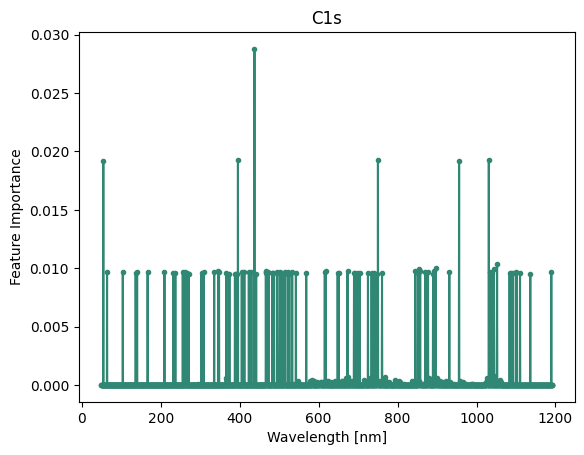

[N1s] train score : 0.952 test score : 0.776


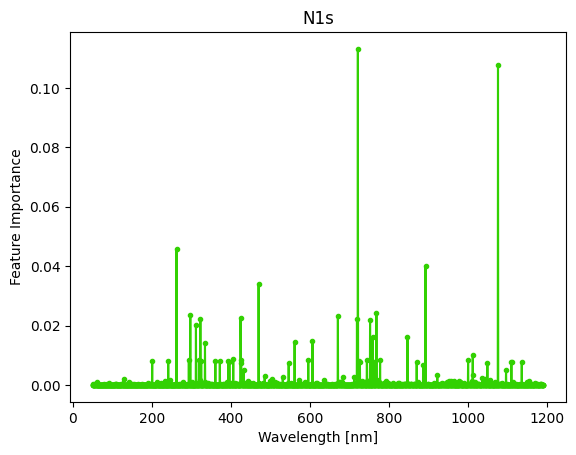

[O1s] train score : 0.985 test score : 0.928


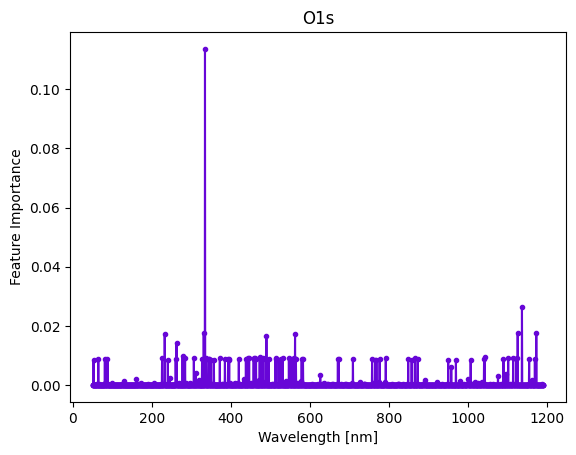

[Si2p] train score : 0.878 test score : 0.349


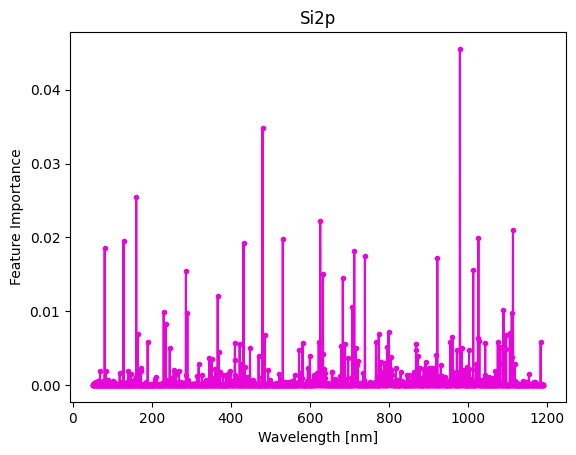

[Cl2p] train score : 1.0 test score : 0.999


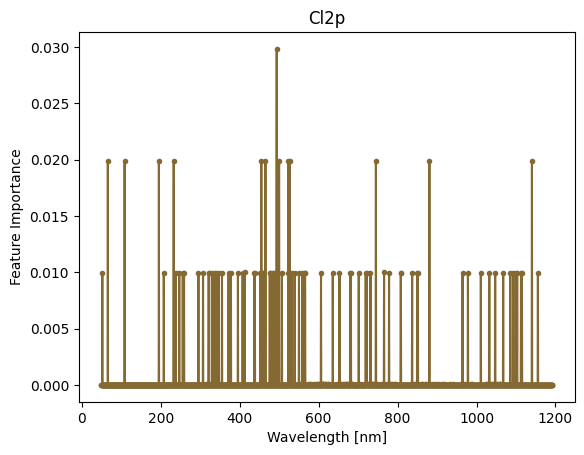

all together : 0.9652437499805444 0.7461888116024769


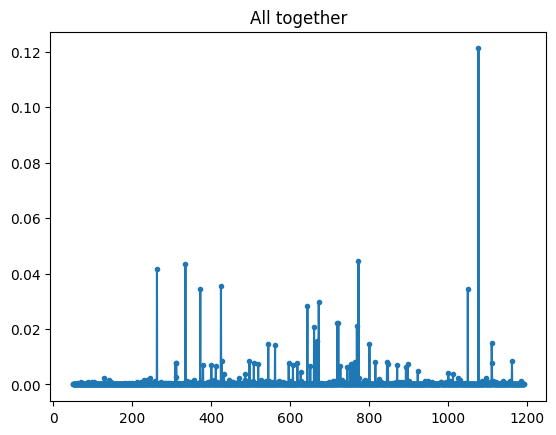

In [98]:
wv = [float(i) for i in N2_input.columns]

for idx, col in enumerate(target.columns):
    rr = RandomForestRegressor()
    rr.fit(train_input, train_target[col])
    print(f'[{col}]', 'train score :', np.round(rr.score(train_input, train_target[col]),3), 'test score :', np.round(rr.score(test_input, test_target[col]), 3))
    plt.plot(wv, rr.feature_importances_, '.-', color=colors[idx])
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Feature Importance')
    plt.title(col)
    plt.show()

rr = RandomForestRegressor()
rr.fit(train_input, train_target)
print('all together :', rr.score(train_input, train_target), rr.score(test_input, test_target))
plt.plot(wv, rr.feature_importances_, '.-')
plt.title('All together')
plt.show()

In [126]:
ref = pd.read_excel('../file/etc/emission_spectrum.xlsx')
ref.head()

,name,wavelength
0,SiN,353.5
1,SiN,404.8
2,SiN,405.1
3,SiN,408.0
4,SiN,408.7


In [127]:
C = ref[(ref['name']=='C')|(ref['name']=='C2')|(ref['name']=='C3')|(ref['name']=='SiC')|(ref['name']=='CN')|(ref['name']=='CN+')|(ref['name']=='CN2')|(ref['name']=='C2H2')|(ref['name']=='C2H5')|(ref['name']=='C3H3')|(ref['name']=='C4H2')|(ref['name']=='C6H6')|(ref['name']=='CH')|(ref['name']=='CH+')|(ref['name']=='CO')|(ref['name']=='CO+')|(ref['name']=='CO2')|(ref['name']=='CO2+')|(ref['name']=='C2O')|(ref['name']=='CHO')|(ref['name']=='CH3O')|(ref['name']=='NCO')].reset_index(drop=True)
N = ref[(ref['name']=='N2+')|(ref['name']=='N2')].reset_index(drop=True)
O = ref[(ref['name']=='O')|(ref['name']=='O2')|(ref['name']=='O2+')|(ref['name']=='H2O')|(ref['name']=='OH')|(ref['name']=='OH+')|(ref['name']=='NO')|(ref['name']=='NO2')|(ref['name']=='NO3')|(ref['name']=='N2O')|(ref['name']=='CO')|(ref['name']=='CO+')|(ref['name']=='CO2')|(ref['name']=='CO2+')|(ref['name']=='C2O')|(ref['name']=='CHO')|(ref['name']=='CH3O')|(ref['name']=='NCO')].reset_index(drop=True)
Si = ref[(ref['name']=='Si')|(ref['name']=='Si2')].reset_index(drop=True)
Cl = ref[(ref['name']=='Cl2')|(ref['name']=='Cl+')|(ref['name']=='Cl')].reset_index(drop=True)

In [185]:
col = 'Cl2p'
i = 0

rr_cl = RandomForestRegressor()
rr_cl.fit(train_input, train_target[col])
print(col, ':', rr_cl.score(train_input, train_target[col]), rr_cl.score(test_input, test_target[col]))

Cl2p : 0.9999222141232703 0.9993866386137916


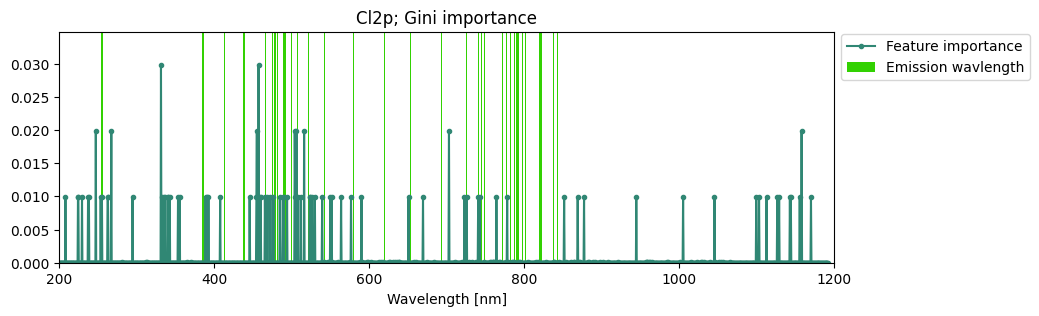

In [186]:
plt.figure(figsize=(10,3))
plt.plot(wv, rr_cl.feature_importances_, '.-', color=colors[i])
plt.bar(Cl['wavelength'].values, (rr_cl.feature_importances_.max()+0.005)*np.ones(len(Cl['wavelength'].values)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rr_cl.feature_importances_.max()+0.005)
plt.xlabel('Wavelength [nm]')
plt.title(f'{col}; Gini importance')
plt.legend(['Feature importance', 'Emission wavlength'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [171]:
# permutation feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(rr_cl, test_input, test_target[col], n_repeats=10, random_state=0, n_jobs=-1)
result

{'importances_mean': array([ 0.00000000e+00,  0.00000000e+00, -9.24072643e-08, ...,
         0.00000000e+00,  0.00000000e+00,  2.63523723e-08]),
 'importances_std': array([0.00000000e+00, 0.00000000e+00, 6.96970300e-08, ...,
        0.00000000e+00, 0.00000000e+00, 5.27047445e-08]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.40657274e-07,  7.60919294e-09, -3.02939546e-08, ...,
         -1.43496222e-07, -1.26053797e-07, -1.52021448e-07],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,

In [172]:
print(len(result.importances_mean), len(train_input.columns))

2048 2048


In [173]:
result.importances_mean.max()

0.0021317004591079546

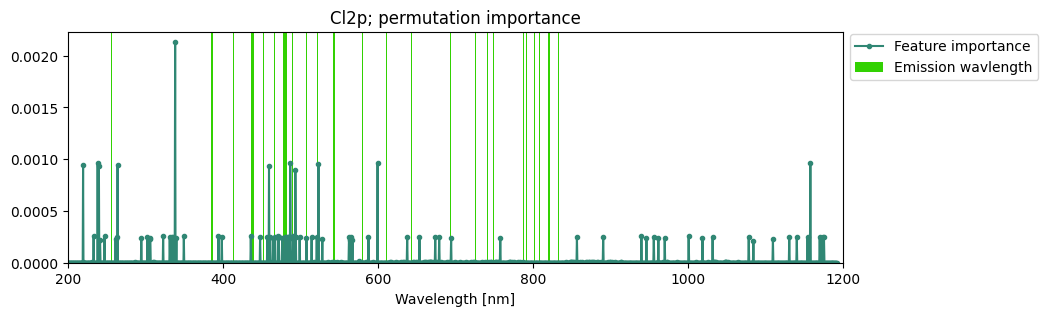

In [177]:
plt.figure(figsize=(10,3))
plt.plot(wv, result.importances_mean, '.-', color=colors[i])
plt.bar(Cl['wavelength'].values, np.ones(len(Cl['wavelength'].values)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,result.importances_mean.max()+0.0001)
plt.xlabel('Wavelength [nm]')
plt.title(f'{col}; permutation importance')
plt.legend(['Feature importance', 'Emission wavlength'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [178]:
rr_c = RandomForestRegressor()
rr_c.fit(train_input, train_target[col])
print(col, ':', rr_c.score(train_input, train_target[col]), rr_c.score(test_input, test_target[col]))

Cl2p : 0.9999273707897961 0.9994772851116589


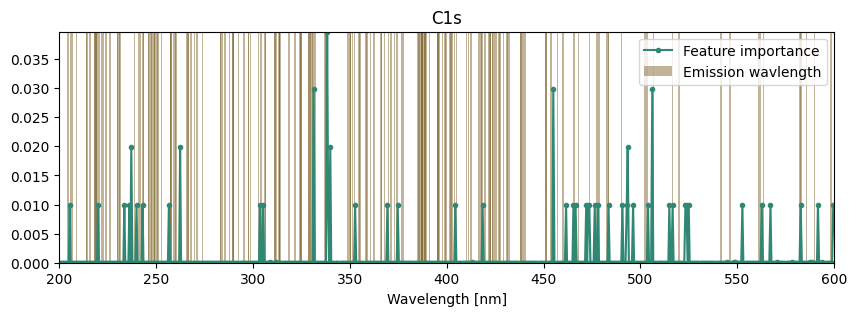

In [184]:
col = 'C1s'
i = 0

plt.figure(figsize=(10,3))
plt.plot(wv, rr_c.feature_importances_, '.-', color=colors[i])
plt.bar(C['wavelength'].values, rr_c.feature_importances_.max()*np.ones(len(C['wavelength'].values)), color=colors[i+4], alpha=0.5)
plt.xlim(200,600)
plt.ylim(0,rr_c.feature_importances_.max())
plt.xlabel('Wavelength [nm]')
plt.title(col)
plt.legend(['Feature importance', 'Emission wavlength'])
plt.show()

In [130]:
df_c = pd.DataFrame(rr_c.feature_importances_, columns=['importance'])
df_c.index = wv
df_c = df_c.sort_values(by='importance', ascending=False)
df_c[df_c['importance']>0.005].to_csv('data/c1s.csv')
# plt.hist(df_c['importance'].values)

In [141]:
c_temp = df_c[df_c['importance']>0.005].reset_index()
c_temp

,index,importance
0,294.64,0.029715
1,757.81,0.019838
2,380.67,0.019826
3,764.13,0.019825
4,725.15,0.010006
...,...,...
90,107.27,0.009880
91,1034.77,0.009878
92,367.21,0.009876
93,473.08,0.009870


In [132]:
C

,name,wavelength
0,CN,806.4
1,CN,787.3
2,CN,785.0
3,CN,743.7
4,CN,725.9
...,...,...
227,CO2+,289.6
228,NCO,440.4
229,NCO,438.5
230,NCO,425.8


In [154]:
def getNames(ref, wavelength, margin=1):
    if wavelength == np.nan:
        return np.nan
    candidates = [] # set
    for idx, row in ref.iterrows():
        if abs(row['wavelength'] - wavelength) <= margin:
            candidates.append(row['name'])
    return ''.join(map(lambda x: str(x)+',',set(candidates)))

In [157]:
names = []
for i in df_c[df_c['importance']>0.005].index:
    names.append(getNames(C, i))
c_temp['name'] = names
c_temp.to_csv('data/c_detected.csv')

O1s : 0.9846142376850509 0.9240317496141781


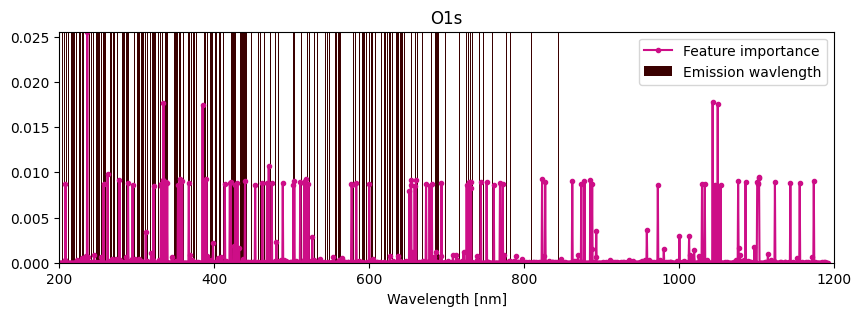

In [224]:
col = 'O1s'
i = 2

rr_o = RandomForestRegressor()
rr_o.fit(train_input, train_target[col])
print(col, ':', rr_o.score(train_input, train_target[col]), rr_o.score(test_input, test_target[col]))
plt.figure(figsize=(10,3))
plt.plot(wv, rr_o.feature_importances_, '.-', color=colors[i])
plt.bar(O['wavelength'].values, rr_o.feature_importances_.max()*np.ones(len(O['wavelength'].values)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rr_o.feature_importances_.max())
plt.xlabel('Wavelength [nm]')
plt.title(col)
plt.legend(['Feature importance', 'Emission wavlength'])
plt.show()

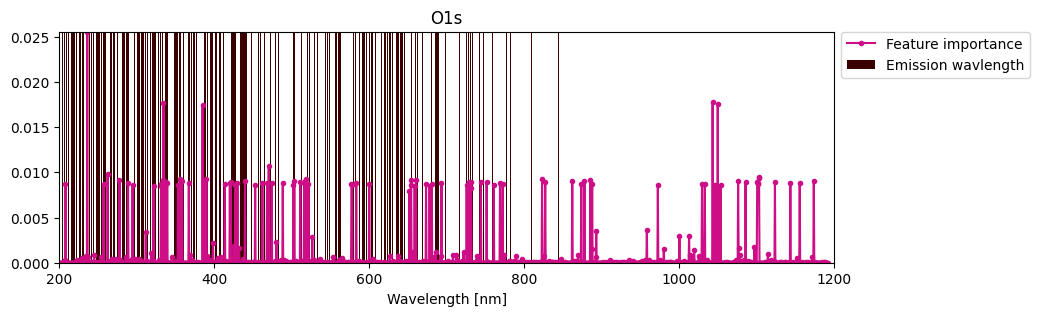

In [225]:
col = 'O1s'
i = 2

plt.figure(figsize=(10,3))
plt.plot(wv, rr_o.feature_importances_, '.-', color=colors[i])
plt.bar(O['wavelength'].values, rr_o.feature_importances_.max()*np.ones(len(O['wavelength'].values)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rr_o.feature_importances_.max())
plt.xlabel('Wavelength [nm]')
plt.title(col)
plt.legend(['Feature importance', 'Emission wavlength'], bbox_to_anchor=(1, 1.03), loc='upper left')
plt.show()

In [233]:
df_o = pd.DataFrame(rr_o.feature_importances_, columns=['importance'])
df_o.index = wv
df_o = df_o.sort_values(by='importance', ascending=False)
# df_o[df_o['importance']>0.005].to_csv('data/o1s.csv')
o_temp = df_o[df_o['importance']>0.001].reset_index()
o_temp

,index,importance
0,236.20,0.025561
1,1043.11,0.017815
2,334.53,0.017727
3,1049.69,0.017509
4,384.98,0.017473
...,...,...
110,726.86,0.001393
111,655.78,0.001168
112,685.83,0.001167
113,721.72,0.001156


In [234]:
names = []
for i in df_o[df_o['importance']>0.001].index:
    names.append(getNames(O, i, margin=0.5))
o_temp['name'] = names
# o_temp.to_csv('data/o_detected.csv')

In [235]:
o_temp['name'].unique()

array(['', 'CO,N2O,', 'O,', 'OH,', 'H2O,', 'CO,', 'O2+,CO,', 'NO,',
       'CO2,', 'CHO,NO,CO2+,', 'O,O2+,O2,', 'CO2+,', 'O2,', 'CO+,CO,',
       'CO+,', 'O2+,', 'CHO,CO,', 'CHO,'], dtype=object)

In [237]:
def extractNames(arr):
    names = []
    for i in arr:
        names.extend(i.split(','))
    while '' in names:
        names.remove('')
    return set(names)

print(len({'CHO', 'CO', 'CO+', 'CO2', 'CO2+', 'H2O', 'N2O', 'NO', 'O', 'O2', 'O2+', 'OH'}))
extractNames(o_temp['name'].unique())

12


{'CHO', 'CO', 'CO+', 'CO2', 'CO2+', 'H2O', 'N2O', 'NO', 'O', 'O2', 'O2+', 'OH'}

In [264]:
N2_input.iloc[40].to_frame().to_csv('data/ref40.csv')

In [278]:
O_detected = pd.read_csv('data/o_detected.csv')
O_detected = O_detected.sort_values(by='index')
O_detected['intensity'] = O_detected['intensity'] / O_detected['intensity'].sum()
O_detected.groupby('name')['intensity'].sum()

name
CHO     0.139072
CO      0.262930
CO+     0.008991
CO2     0.008318
CO2+    0.095907
H2O     0.040313
N2O     0.103604
NO      0.108159
O       0.102676
O2      0.042960
O2+     0.010353
OH      0.076717
Name: intensity, dtype: float64

In [279]:
O_detected['intensity'].sum()

1.0000000000000002

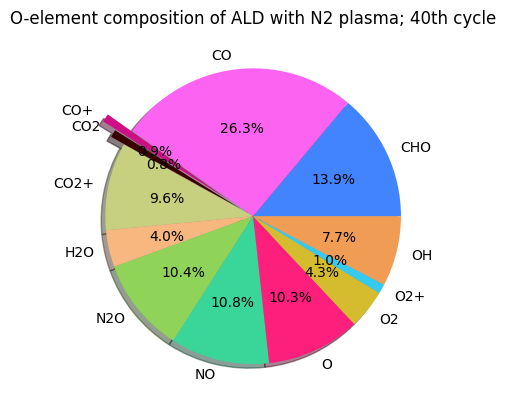

In [301]:
random.seed(10)

O_detected.groupby('name')['intensity'].sum().plot.pie(colors=colors, shadow=True, explode=(0,0,0.2,0.1,0,0,0,0,0,0,0,0), autopct='%1.1f%%')
plt.axis('off')
plt.title('O-element composition of ALD with N2 plasma; 40th cycle')
plt.show()

Cl2p : 0.9999534603075162 0.9997790507755531


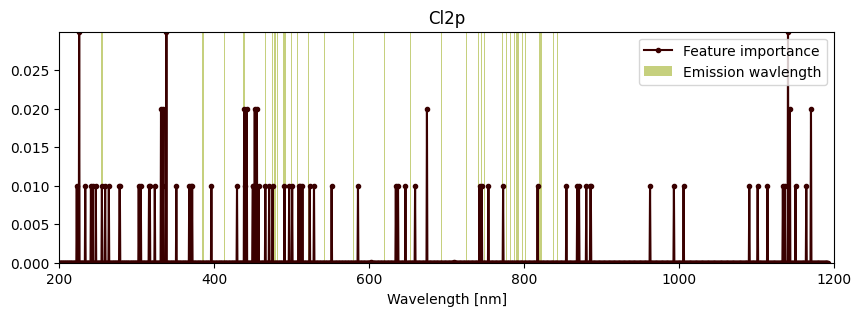

In [106]:
col = 'Cl2p'
i = 3

rr_cl.fit(train_input, train_target[col])
print(col, ':', rr_cl.score(train_input, train_target[col]), rr_cl.score(test_input, test_target[col]))
plt.figure(figsize=(10,3))
plt.plot(wv, rr_cl.feature_importances_, '.-', color=colors[i])
plt.bar(Cl['wavelength'].values, rr_cl.feature_importances_.max()*np.ones(len(Cl['wavelength'].values)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rr_cl.feature_importances_.max())
plt.xlabel('Wavelength [nm]')
plt.title(col)
plt.legend(['Feature importance', 'Emission wavlength'])
plt.show()

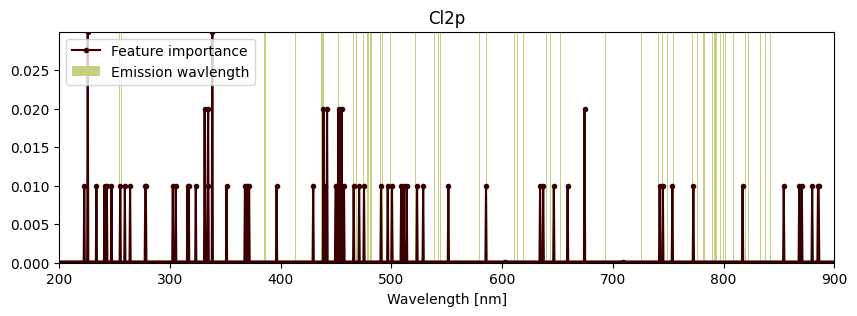

In [107]:
plt.figure(figsize=(10,3))
plt.plot(wv, rr_cl.feature_importances_, '.-', color=colors[i])
plt.bar(Cl['wavelength'].values, rr_cl.feature_importances_.max()*np.ones(len(Cl['wavelength'].values)), color=colors[i+1])
plt.xlim(200,900)
plt.ylim(0,rr_cl.feature_importances_.max())
plt.xlabel('Wavelength [nm]')
plt.title(col)
plt.legend(['Feature importance', 'Emission wavlength'])
plt.show()